Maxime BLANCHON

#### *Programmation sur Grille de Calcul - Générateurs de Variables Aléatoires*

# TP3 - Méthodes de Monte-Carlo

↓ Import des bibliothèques utilisées dans les execices ↓

In [20]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from typing import Callable, List
from itertools import repeat
import seaborn as sns
from scipy.integrate import dblquad

SIZES = [100, 1000, 10_000, 50_000, 100_000, 500_000, 1_000_000]

## Exercice 1

Calcul de $\pi$ par la méthode du "hit or miss" :

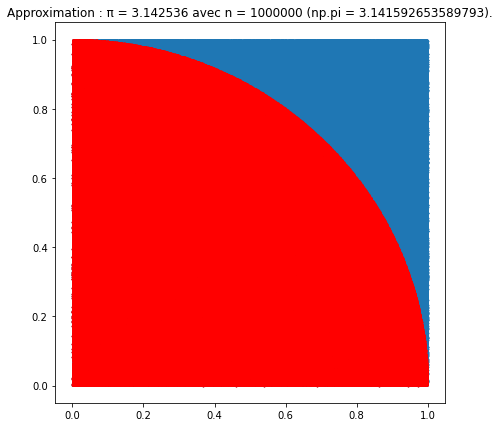

3.142536

In [2]:
def hit_or_miss(n: int, plot: bool = False) -> float:
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    
    is_inside = (x*x)+(y*y)<1
    approx_pi = 4*np.sum(is_inside)/n
    
    if(plot):
        x_in = x[is_inside]
        y_in = y[is_inside]

        plt.figure(figsize=[7, 7])
        plt.scatter(x, y, s=1)
        plt.scatter(x_in, y_in, color="r", s=1)
        plt.title(f"Approximation : π = {approx_pi} avec n = {n} (np.pi = {np.pi}).")
        plt.show()
    
    return approx_pi
    
hit_or_miss(1_000_000, plot=True)

In [3]:
def plot_error_function(sizes: List[int], approximations: List[float], errors: List[float], title: str) -> None:
    sizes_log = np.log(SIZES)
    plt.scatter(sizes_log, errors, facecolors='none', edgecolors='b', linewidths=2)
    plt.plot(sizes_log, approximations, color='r',  label=f'Approximation')
    plt.scatter(sizes_log, approximations, facecolors='none', edgecolors='r', linewidths=2)
    plt.xlabel("Taille de l'échantillon (log)")
    plt.ylabel("Erreur")
    plt.legend()
    plt.title(title)

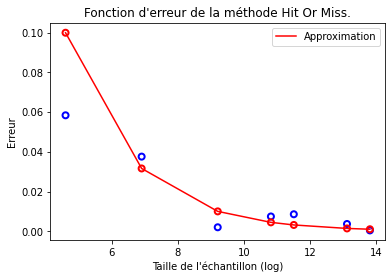

In [4]:
hm_approximations = []
hm_errors = []

for size in SIZES:
    approx = hit_or_miss(size)
    hm_errors.append(abs(approx - np.pi))
    hm_approximations.append(1/sqrt(size))

plot_error_function(SIZES, hm_approximations, hm_errors, "Fonction d'erreur de la méthode Hit Or Miss.")

## Exercice 2



**Question 1 :**

En effectuant les changements de variables suivant :
- $u=arcsin(x)$,
- $du = \frac {1} {\sqrt {1 - x^2}}$,

nous trouvons $J = 0.602845$.

In [5]:
J_VALUE = 0.602845

**Question 2 :**

In [6]:
def f(x: float) -> float:
    return (1 / 2) * (np.exp(np.arcsin(x))) * (x / np.sqrt(1 - (x * x)))

def monte_carlo(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b))
    return (b - a) * mc_sum / n

print(f'[Monte Carlo] Estimation : J = {monte_carlo(0.1, 0.9, 100_000, f)} (pour n = {100_000})')

[Monte Carlo] Estimation : J = 0.6031970635814655 (pour n = 100000)


**Question 3 :**

In [7]:
f_monte_carlo = []
for n in SIZES:
    res = monte_carlo(0.1, 0.9, n, f)
    f_monte_carlo.append(res)
    print(f'[Monte Carlo] Estimation : J = {res}  (pour n = {n})')

[Monte Carlo] Estimation : J = 0.5597796926758055  (pour n = 100)
[Monte Carlo] Estimation : J = 0.6094043548309797  (pour n = 1000)
[Monte Carlo] Estimation : J = 0.6035987714526102  (pour n = 10000)
[Monte Carlo] Estimation : J = 0.5996506511056693  (pour n = 50000)
[Monte Carlo] Estimation : J = 0.6028273688372451  (pour n = 100000)
[Monte Carlo] Estimation : J = 0.6026712787356784  (pour n = 500000)
[Monte Carlo] Estimation : J = 0.6033229802764134  (pour n = 1000000)


On peut voir qu'en fonction du nombre de valeurs simulées $n$, la valeur de l'intégrale J converge vers sa véritable valeur, calculée à la question 1. 

**Question 4 :**

In [8]:
def rectangles_method(a: float, b: float, n: int, f: Callable) -> float:
    rec_sum = 0
    h = (b - a) / n
    
    for k in range(n-1):
        rec_sum += f(a + k * h)
        
    return h * rec_sum

In [9]:
f_rectangle = []
for n in SIZES:
    res = rectangles_method(0.1, 0.9, n, f)
    f_rectangle.append(res)
    print(f'[Rectangles Method] Estimation : J = {res}  (pour n = {n})')

[Rectangles Method] Estimation : J = 0.5667942925845  (pour n = 100)
[Rectangles Method] Estimation : J = 0.5990893619507717  (pour n = 1000)
[Rectangles Method] Estimation : J = 0.6024682238648716  (pour n = 10000)
[Rectangles Method] Estimation : J = 0.6027699557026537  (pour n = 50000)
[Rectangles Method] Estimation : J = 0.6028076882127177  (pour n = 100000)
[Rectangles Method] Estimation : J = 0.6028378767870706  (pour n = 500000)
[Rectangles Method] Estimation : J = 0.6028416505193059  (pour n = 1000000)


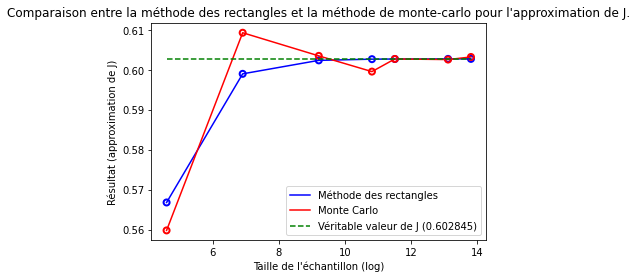

In [10]:
def plot_values(sizes: List[int], f1: List[float], f2: List[float]) -> None:
    sizes_log = np.log(SIZES)
    plt.plot(sizes_log, f1, color='blue', label='Méthode des rectangles')
    plt.scatter(sizes_log, f1, facecolors='none', edgecolors='b', linewidths=2)
    plt.plot(sizes_log, f2, color='red', label='Monte Carlo')
    plt.scatter(sizes_log, f2, facecolors='none', edgecolors='r', linewidths=2)
    line = list(repeat(J_VALUE, len(SIZES)))
    plt.plot(sizes_log, line, linestyle='dashed', color='green', label=f'Véritable valeur de J ({J_VALUE})')
    plt.xlabel("Taille de l'échantillon (log)")
    plt.ylabel("Résultat (approximation de J)")
    plt.legend()
    plt.title("Comparaison entre la méthode des rectangles et la méthode de monte-carlo pour l'approximation de J.")
    
plot_values(SIZES, f_rectangle, f_monte_carlo)

La méthode de quadrature (dans notre cas la méthode des rectangles) converge plus rapidement que la méthode de Monte Carlo.

**Question 5 :**

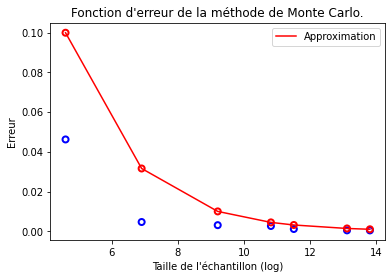

In [11]:
mc_approximations = []
mc_errors = []

for size in SIZES:
    approx =  monte_carlo(0.1, 0.9, size, f)
    error = abs(approx - J_VALUE)
    mc_errors.append(error)
    mc_approximations.append(1/sqrt(size))

plot_error_function(SIZES, mc_approximations, mc_errors, "Fonction d'erreur de la méthode de Monte Carlo.")

**Question 6 :**

In [12]:
def batchs_method(m, n):
    batch_len = int(n / m)
    batches = []
    
    for i in range(m):
        batches.append(monte_carlo(0.1, 0.9, batch_len, f))
        
    return batches, sum(batches) / m

batches, avg = batchs_method(5000, 1_000_000)
print(f'Evaluation Monte Carlo de J = {avg}')

Evaluation Monte Carlo de J = 0.6025313849765316


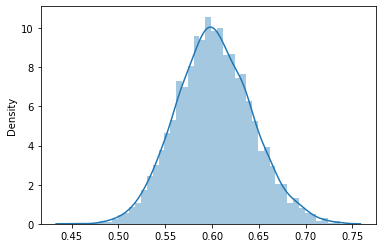

In [13]:
sns.distplot(batches)

= on se rapproche du théorème central limite

## Exercice 3

1 - La valeur de l'intégrale I est 0.159491.

In [14]:
# 2
def y_func(x: int, y: int) -> float:
    return x * y * np.sin(1 / (x * y))**2

def monte_carlo_v2(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b), np.random.uniform(a, b))
    return (b - a) * mc_sum / n

# 3
f_monte_carlo = []
for n in SIZES:
    res = monte_carlo_v2(0, 1, n, y_func)
    f_monte_carlo.append(res)
    print(f'Nombre de valeurs simulées n = {n}, estimation de J = {res}')

Nombre de valeurs simulées n = 100, estimation de J = 0.18435508218381358
Nombre de valeurs simulées n = 1000, estimation de J = 0.16100671935655952
Nombre de valeurs simulées n = 10000, estimation de J = 0.16151625092464741
Nombre de valeurs simulées n = 50000, estimation de J = 0.15958685674676726
Nombre de valeurs simulées n = 100000, estimation de J = 0.15720954650306315
Nombre de valeurs simulées n = 500000, estimation de J = 0.15933192244577932
Nombre de valeurs simulées n = 1000000, estimation de J = 0.15971170938656637


In [21]:
# 4

def integrale2(N):
    dx = 1/N
    def g(i,j):
        return (i*j*dx*dx)*(np.sin(1/(i*j*dx*dx)))**2
    g = np.fromfunction(g,(N,N))
    clean_x = g[np.isnan(g)==False]
    return abs(clean_x.sum()*(1/N)**2)
integrale2(10000)

0.15945294248866315

Nombre de tirages n = 100, erreur numérique = 0.03697794745310154
Nombre de tirages n = 1000, erreur numérique = 0.0037475834569641875
Nombre de tirages n = 10000, erreur numérique = 0.003957944892308968
Nombre de tirages n = 50000, erreur numérique = 0.0002307774545006469
Nombre de tirages n = 100000, erreur numérique = 0.00040922766582141
Nombre de tirages n = 500000, erreur numérique = 0.00016024600937630806
Nombre de tirages n = 1000000, erreur numérique = 8.30028799315985e-05


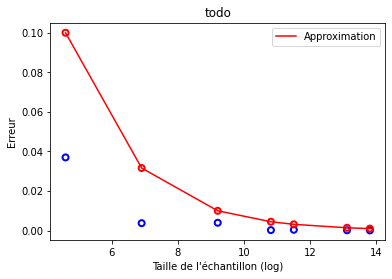

In [17]:
# 5
I_VALUE = 0.159491
approximations = []
errors = []

for size in SIZES:
    approx =  monte_carlo_v2(0, 1, size, y_func)
    error = abs(approx - I_VALUE)
    errors.append(error)
    approximations.append(1/sqrt(size))
    print(f'Nombre de tirages n = {size}, erreur numérique = {error}')

plot_error_function(SIZES, approximations, errors, "todo")

In [18]:
#6 
def batch(m, n):
    batch_len = int(n / m)
    batches = []
    
    for i in range(m):
        batches.append(monte_carlo_v2(0, 1, batch_len, y_func))
        
    return batches, sum(batches) / m

batches, avg = batch(5000, 1_000_000)
print('moyenne = ', avg)

moyenne =  0.15923056604732752


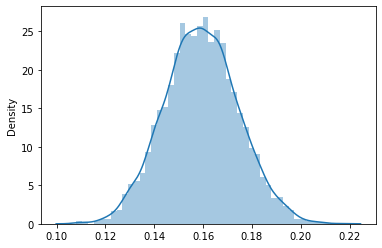

In [19]:
sns.distplot(batches)